In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
display(HTML("<style>.output_result { max-width:100% !important; }</style>"))

In [1]:
import os
import sys
# sys.path.append('/home/thabib/Documents/Personal/Master_Thesis/1_HTMImplementation/ufuncs.py')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import time
import random
import time
import h5py
import collections

import ipywidgets as widgets
from ipywidgets import interact, interact_manual, interactive

from rebergrammar_generator_v2 import *
from experimentor_v2 import Experimentor
from ufuncs import full_pickle, unpickle, compress_pickle, decompress_pickle

os.getcwd()
# np.set_printoptions(threshold=sys.maxsize)

'/home/thabib/Documents/Personal/Master_Thesis/1_HTMImplementation'

In [2]:
cd ./Results

/home/thabib/Documents/Personal/Master_Thesis/1_HTMImplementation/Results


In [3]:
ls

network_figs/
trial_1_SRG_5000_chars_to_minicols.pickle
trial_1_SRG_5000_exp_params.pickle
trial_1_SRG_5000_in_strings_oh.pickle
trial_1_SRG_5000_out_strings_oh.pickle
trial_1_SRG_5000_results.pbz2
trial_2_SRG_2000_chars_to_minicols.pickle
trial_2_SRG_2000_exp_params.pickle
trial_2_SRG_2000_in_strings_oh.pickle
trial_2_SRG_2000_out_strings_oh.pickle
trial_2_SRG_2000_results.pbz2
trial_3_SRG_5000_chars_to_minicols.pickle
trial_3_SRG_5000_exp_params.pickle
trial_3_SRG_5000_in_strings_oh.pickle
trial_3_SRG_5000_out_strings_oh.pickle
trial_3_SRG_5000_results.pbz2
trial_4_SRG_5000_chars_to_minicols.pickle
trial_4_SRG_5000_exp_params.pickle
trial_4_SRG_5000_in_strings_oh.pickle
trial_4_SRG_5000_out_strings_oh.pickle
trial_4_SRG_5000_results.pbz2


In [4]:
do_ERG = False
trial = 'trial_1_'
nof_strings = 5000


if do_ERG:
    exp_filename = trial+'ERG_'+str(nof_strings)
else:
    exp_filename = trial+'SRG_'+str(nof_strings)
    
    
# USING PICKLE
filename = exp_filename+'_chars_to_minicols'
charsMC = unpickle(filename)
filename = exp_filename+'_in_strings_oh'
in_strings_onehot = unpickle(filename)
filename = exp_filename+'_out_strings_oh'
out_strings_onehot = unpickle(filename)
filename = exp_filename+'_exp_params'
dict_params = unpickle(filename)

In [5]:
filename = exp_filename+'_results'
results = decompress_pickle(filename)
results.set_index('reber_string', inplace=True)

#results = dict_results['results']
#results.set_index('reber_string', inplace=True)

# Analysis of Results

In [6]:
# dict_params = {
#  'M': 8,
#  'N': 175,
#  'k': 25,
#  'dendrites_percell': 32,
#  'connSynapses_perdend': 32,
#  'nmda_th': 20,
#  'perm_th': 0.4,
#  'perm_init': 0.25,
#  'activity_horizon': None,
#  'activity_th': None,
#  'perm_decrement': 0.05,
#  'perm_increment': 0.1,
#  'perm_decay': 0.010000000000000002,
#  'perm_boost': 0.005000000000000001,
#  'do_ERG': False,
#  'nof_strings': 2000}

display(dict_params)

M = dict_params['M']
N = dict_params['N']

# Generating xticks for plots based on characters-minicols

xticks_plot = np.empty(N, dtype=object)
for ch in chars:
    xticks_plot[charsMC[ch]] = ch
    
xticks_plot
xticks_pos = np.array([0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,
         9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,
        18.5,  19.5,  20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,
        27.5,  28.5,  29.5,  30.5,  31.5,  32.5,  33.5,  34.5,  35.5,
        36.5,  37.5,  38.5,  39.5,  40.5,  41.5,  42.5,  43.5,  44.5,
        45.5,  46.5,  47.5,  48.5,  49.5,  50.5,  51.5,  52.5,  53.5,
        54.5,  55.5,  56.5,  57.5,  58.5,  59.5,  60.5,  61.5,  62.5,
        63.5,  64.5,  65.5,  66.5,  67.5,  68.5,  69.5,  70.5,  71.5,
        72.5,  73.5,  74.5,  75.5,  76.5,  77.5,  78.5,  79.5,  80.5,
        81.5,  82.5,  83.5,  84.5,  85.5,  86.5,  87.5,  88.5,  89.5,
        90.5,  91.5,  92.5,  93.5,  94.5,  95.5,  96.5,  97.5,  98.5,
        99.5, 100.5, 101.5, 102.5, 103.5, 104.5, 105.5, 106.5, 107.5,
       108.5, 109.5, 110.5, 111.5, 112.5, 113.5, 114.5, 115.5, 116.5,
       117.5, 118.5, 119.5, 120.5, 121.5, 122.5, 123.5, 124.5, 125.5,
       126.5, 127.5, 128.5, 129.5, 130.5, 131.5, 132.5, 133.5, 134.5,
       135.5, 136.5, 137.5, 138.5, 139.5, 140.5, 141.5, 142.5, 143.5,
       144.5, 145.5, 146.5, 147.5, 148.5, 149.5, 150.5, 151.5, 152.5,
       153.5, 154.5, 155.5, 156.5, 157.5, 158.5, 159.5, 160.5, 161.5,
       162.5, 163.5, 164.5, 165.5, 166.5, 167.5, 168.5, 169.5, 170.5,
       171.5, 172.5, 173.5, 174.5])

{'M': 8,
 'N': 175,
 'k': 25,
 'dendrites_percell': 32,
 'connSynapses_perdend': 32,
 'nmda_th': 25,
 'perm_th': 0.4,
 'perm_init': 0.2,
 'activity_horizon': None,
 'activity_th': None,
 'perm_decrement': 0.01,
 'perm_increment': 0.02,
 'perm_decay': 0.002,
 'perm_boost': 0.001,
 'do_ERG': False,
 'nof_strings': 5000,
 'trial': 'trial_1_'}

In [7]:
%matplotlib notebook

<IPython.core.display.Javascript object>


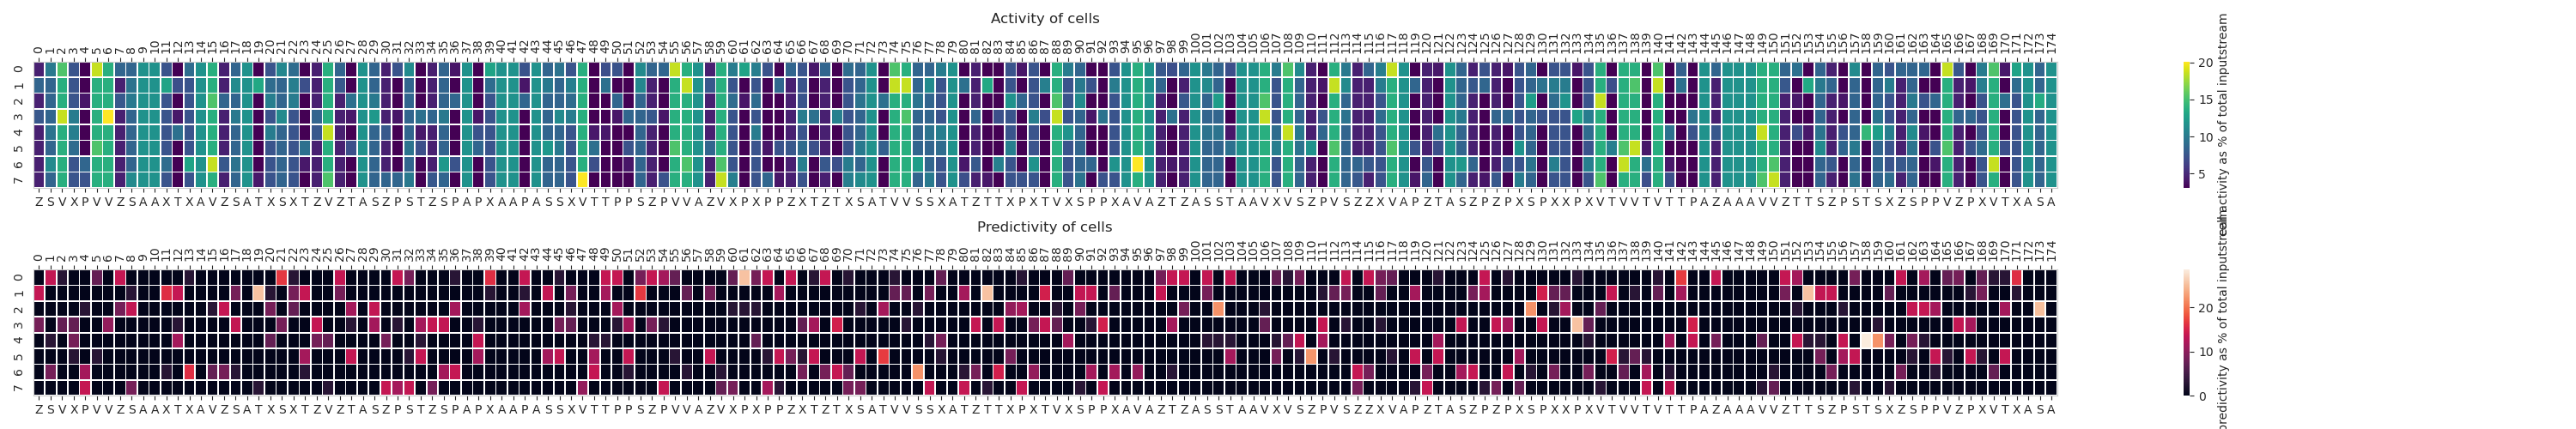

In [10]:
in_strings_alpha = [s for s in list(results.index)]

# NOF TOTAL CHARACTERS in the input stream
tot_len_in = 0
for string in in_strings_alpha:
    tot_len_in += len(string)


cell_activity = np.zeros([M,N])
for string_idx in range(len(in_strings_alpha)):
    cell_activity += sum(results.iloc[string_idx]['htm_states']) # RHS sums up the net cellular activity 
                                                                 # for each letter of the string.
cell_predictivity = np.zeros([M,N])
for string_idx in range(len(in_strings_alpha)):
    cell_predictivity += sum(results.iloc[string_idx]['htm_preds'])

# Normalizing the net cellular predictivity of each cell
cell_predictivity = (cell_predictivity/tot_len_in)*100
# Normalizing the net cellular activity of each cell
cell_activity = (cell_activity/tot_len_in)*100


sns.set_style("whitegrid")
fig, axes = plt.subplots(2,1, sharex=False, figsize=(30,5))

sns.heatmap(cell_activity, linewidth=0.5, cmap='viridis', xticklabels=xticks_plot, 
            ax=axes[0], cbar_kws={'label':'cell activity as % of total inputstream'})
axes[0].set_title('Activity of cells')
ax_0 = axes[0].twiny()
ax_0.set_xticks(axes[0].get_xticks())
ax_0.set_xbound(axes[0].get_xbound())
ax_0.set_xticklabels([str(i) for i in np.arange(N)], rotation=90)
ax_0.tick_params(grid_alpha=0)


sns.heatmap(cell_predictivity, linewidth=0.5, xticklabels=xticks_plot,
            ax=axes[1], cbar_kws={'label':'cell predictivity as % of total inputstream'})
axes[1].set_title('Predictivity of cells')
ax_0 = axes[1].twiny()
ax_0.set_xticks(axes[1].get_xticks())
ax_0.set_xbound(axes[1].get_xbound())
ax_0.set_xticklabels([str(i) for i in np.arange(N)], rotation=90)
ax_0.tick_params(grid_alpha=0)

plt.tight_layout()
plt.show()

xticks_pos = axes[0].get_xticks()

### 3.2 Network's Neuron's Dendritic Architecture after the Above Given Reber String

In [16]:
%matplotlib notebook

<IPython.core.display.Javascript object>


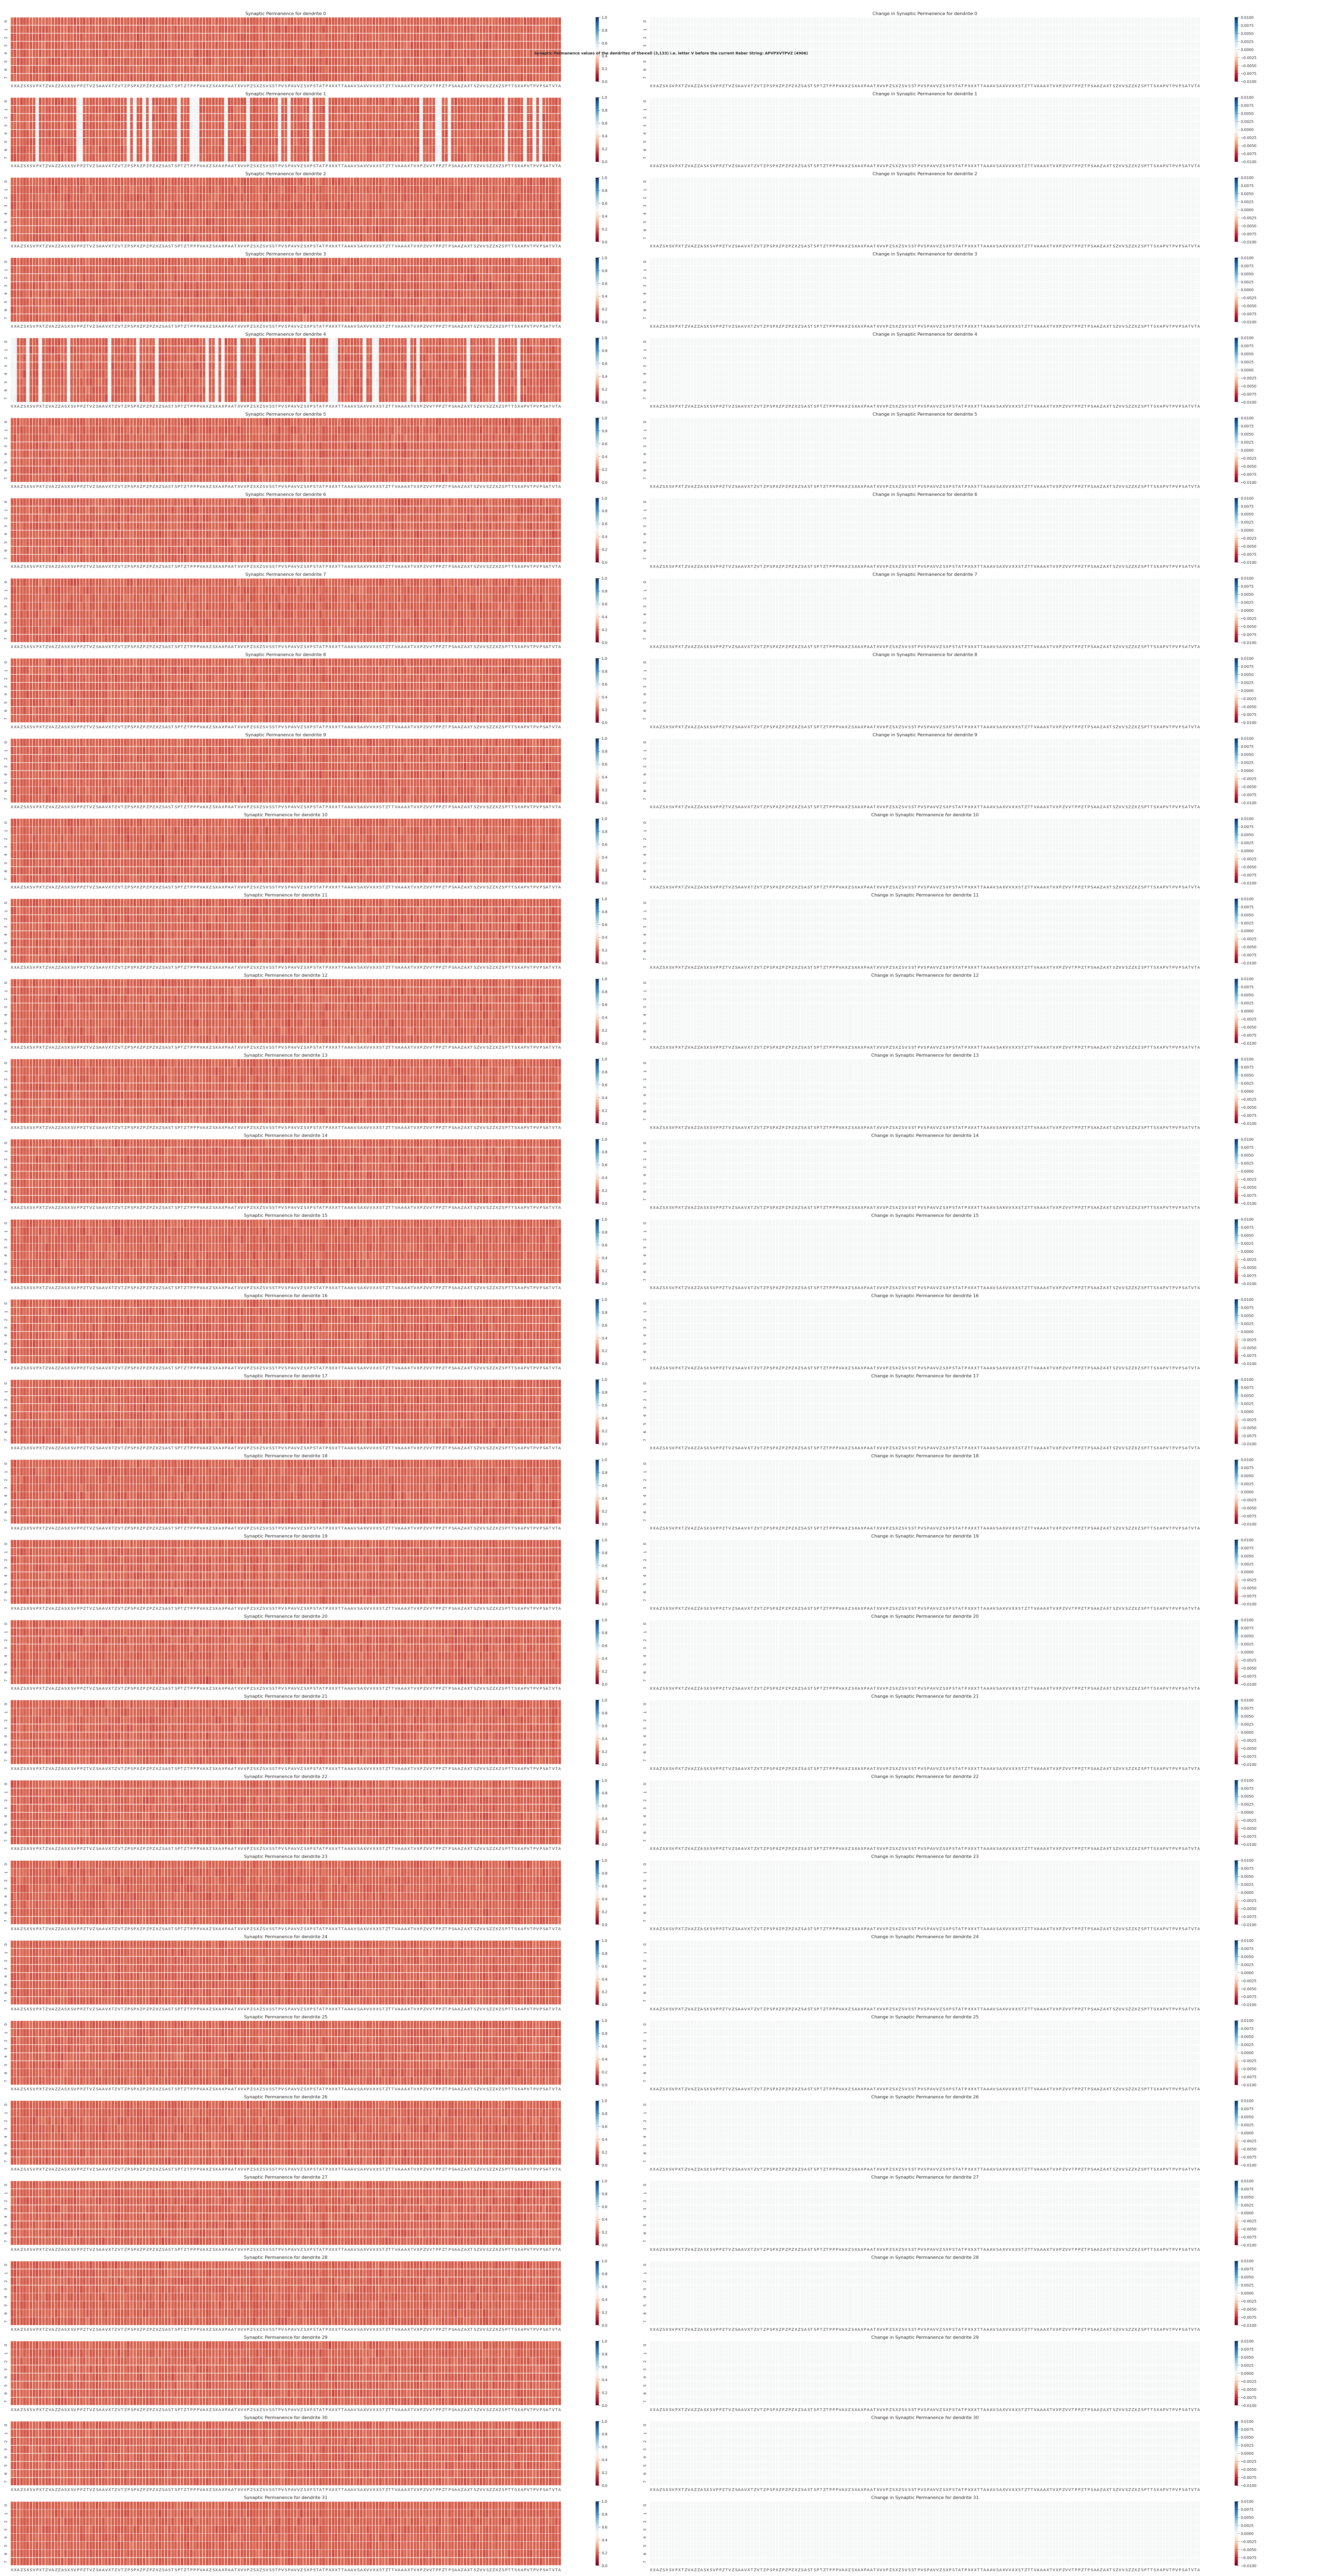

In [17]:
reber_string_idx = 4998
reber_string = results.iloc[reber_string_idx].name
res_reber_string = results.iloc[reber_string_idx]

cell_idx = (3,133)

n_dendrites = dict_params['dendrites_percell']

sns.set_style("whitegrid")
fig, axes = plt.subplots(n_dendrites,2, figsize=(50,3*n_dendrites))# gridspec_kw={'width_ratios': [6, 4]})

for d in range(n_dendrites):
    
    # Plot the permanence value just before the current Reber String
    dend_prev_permanence = res_reber_string['htm_network'][cell_idx[0]][cell_idx[1]].dendrites[d]
    
    sns.heatmap(dend_prev_permanence, vmax=1, vmin=0, cbar=True, linewidth=0.5, cmap='RdBu', ax=axes[d][0])
    axes[d][0].set_title(f'Synaptic Permanence for dendrite {d}')
    axes[d][0].set_xticks(xticks_pos)
    axes[d][0].set_xticklabels(xticks_plot, rotation=0)
    
    # Plot the changes in the permanence values after the current Reber String
    dend_next_permanence = results.iloc[reber_string_idx+1]['htm_network'][cell_idx[0]][cell_idx[1]].dendrites[d]
    delta_permanence = dend_next_permanence - dend_prev_permanence
    
    sns.heatmap(delta_permanence, vmax=0.01, vmin=-0.01, cbar=True, linewidth=0.5, cmap='RdBu', ax=axes[d][1])
    axes[d][1].set_title(f'Change in Synaptic Permanence for dendrite {d}')
    axes[d][1].set_xticks(xticks_pos)
    axes[d][1].set_xticklabels(xticks_plot, rotation=0)

    
fig.suptitle(f'Synaptic Permanence values of the dendrites of the cell ({cell_idx[0]},{cell_idx[1]}) i.e. letter {charsMC.columns[np.where(charsMC == cell_idx[1])[1]][0]} before the current Reber String: {reber_string} ({reber_string_idx})', 
             fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


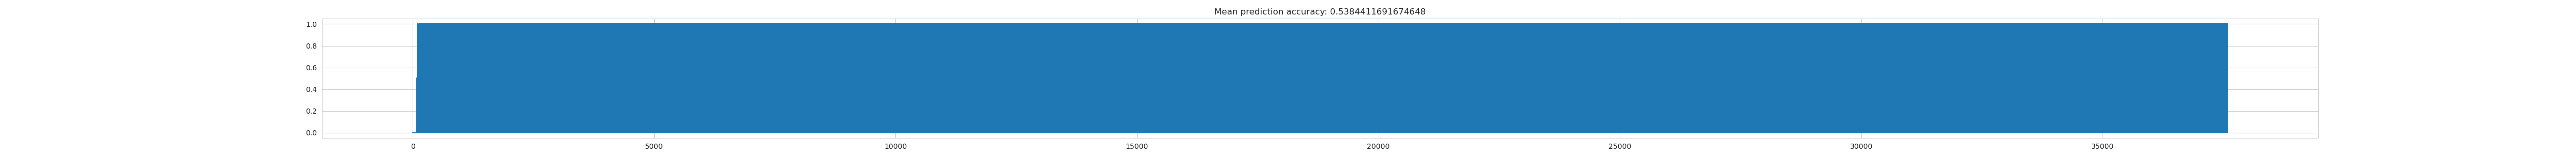

Mean prediction accuracy (for trial_1 wth nmda_th=25):  0.5384411691674648
Prediction Accuracy Frequencies: 
0.0 ::  17288
0.06 ::  1
0.08 ::  1
0.12 ::  1
0.3333333333333333 ::  19
0.5 ::  49
0.52 ::  1
0.54 ::  1
0.56 ::  2
0.6666666666666666 ::  58
0.9866666666666667 ::  1
1.0 ::  20166


In [12]:
pred_acc = []

for string_idx in range(len(in_strings_alpha)):
    
    for char_idx in range(len(results.iloc[string_idx]['htm_preds'])):
        
        correct_preds = out_strings_onehot[string_idx][char_idx] # Correct expected predictions for the 
                                                                 # particular <[string_idx][char_idx]> timestep
        
        predicted_cols_idx = np.where(results.iloc[string_idx]['htm_preds'][char_idx])[1] # Indices of the cols
                                                                 # predicted by the network for particular 
                                                                 # <[string_idx][char_idx]> timestep.
        
        count=0
        for col_idx in np.where(correct_preds)[0]:
            if col_idx in predicted_cols_idx:
                count+=1

        accuracy = count/np.count_nonzero(correct_preds)
        pred_acc.append(accuracy)
        
plt.figure(figsize=(50,3))
plt.plot(pred_acc)
plt.title(f'Mean prediction accuracy: {np.mean(pred_acc)}')
plt.show()

print('Mean prediction accuracy (for trial_1 wth nmda_th=25): ', np.mean(pred_acc))

count_pred_acc = collections.Counter(pred_acc)

print('Prediction Accuracy Frequencies: ')
for key in sorted(dict(count_pred_acc).keys()):
    print(key,':: ', dict(count_pred_acc)[key])